<a href="https://colab.research.google.com/github/carlotamartin/Trazabilidad-de-los-tomates/blob/main/1_Creaci%C3%B3n_de_datos_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## CREACIÓN DE LOS DATOS


## Lectura de los datos

Importamos las librerías necesarias



In [ ]:
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
%matplotlib inline
import seaborn as sns
import pandas as pd
import numpy as np
from ipywidgets import interactive
import ipywidgets as widgets

  ### **Loading data**  

Vamos a leer todos los datasets y unirlos

Escribimos la ruta donde están los archivos CSV

In [ ]:
ruta = "/content/drive/MyDrive/UAX/Inteligencia Artificial/Tomates de Almería/Parte 1/Data/nhk3gs7gmm-1"

Creamos una lista para almacenar los dataframes

In [ ]:
dataframes = []

Recorremos todos los archivos en la ruta especificada. Importamos la librerías `os`

In [ ]:
import os

In [ ]:
for file in os.listdir(ruta):
    if file.endswith(".csv"):
        file_path = os.path.join(ruta, file)
        df = pd.read_csv(file_path, sep=";")
        dataframes.append(df)

Unimos todos los dataframes en uno

In [ ]:
df = pd.concat(dataframes, ignore_index=True)

In [ ]:
df

,cicle,temperature,humidity,RSSI,date,hour
0,1.0,13.0,58.0,-64.0,24/03/2018,21:07:28
1,2.0,13.0,58.0,-64.0,24/03/2018,21:07:38
2,3.0,13.0,58.0,-64.0,24/03/2018,21:07:48
3,4.0,13.0,58.0,-64.0,24/03/2018,21:07:58
4,5.0,13.0,58.0,-64.0,24/03/2018,21:08:08
...,...,...,...,...,...,...
17300,60.0,10.0,69.0,-81.0,21/03/2018,21:53:38
17301,61.0,10.0,69.0,-81.0,21/03/2018,21:53:48
17302,62.0,10.0,69.0,-81.0,21/03/2018,21:53:58
17303,63.0,10.0,69.0,-81.0,21/03/2018,21:54:08


  ### **Data cleaning**  

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17305 entries, 0 to 17304
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   cicle        17300 non-null  float64
 1   temperature  17300 non-null  float64
 2   humidity     17301 non-null  float64
 3   RSSI         17300 non-null  float64
 4   date         17300 non-null  object 
 5   hour         17300 non-null  object 
dtypes: float64(4), object(2)
memory usage: 811.3+ KB


In [ ]:
df.shape

(17305, 6)

In [ ]:
df.isna().sum()

cicle          5
temperature    5
humidity       4
RSSI           5
date           5
hour           5
dtype: int64

Las filas con valores nulos son:

In [ ]:
df[df.isnull().any(axis=1)]

,cicle,temperature,humidity,RSSI,date,hour
2863,NaN,NaN,NaN,NaN,NaN,NaN
4144,NaN,NaN,NaN,NaN,NaN,NaN
12047,NaN,NaN,47.0,NaN,NaN,NaN
12113,NaN,NaN,NaN,NaN,NaN,NaN
12180,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df[df.isnull().any(axis=1)].shape

(5, 6)

Como vemos tenemos varias variables con valores nulos, vamos a eliminarlas. hemos optado por esta opción, ya que tenemos muchas filas (17305).

Si tuviesemos pocas filas, buscaríamos otras opciones como reemplazar por un valor aleatorio entre el maximo y el minimo de la columna. O por ejempll tambien cambiarlo por la media de la columna

In [ ]:
df = df.dropna()

Comprobamos que se han eliminado

In [ ]:
df.isna().sum()

cicle          0
temperature    0
humidity       0
RSSI           0
date           0
hour           0
dtype: int64

In [ ]:
df.shape

(17300, 6)

In [ ]:
df.describe()

,cicle,temperature,humidity,RSSI
count,17300.000000,17300.000000,17300.000000,17300.000000
mean,55.423642,13.969480,55.821908,-77.550983
std,271.712437,2.343302,9.333133,13.453291
min,1.000000,8.000000,40.000000,-99.000000
25%,17.000000,13.000000,47.000000,-89.000000
50%,33.000000,14.000000,56.000000,-80.000000
75%,49.000000,15.000000,64.000000,-67.000000
max,4453.000000,21.000000,72.000000,73.000000


In [ ]:
df

,cicle,temperature,humidity,RSSI,date,hour
0,1.0,13.0,58.0,-64.0,24/03/2018,21:07:28
1,2.0,13.0,58.0,-64.0,24/03/2018,21:07:38
2,3.0,13.0,58.0,-64.0,24/03/2018,21:07:48
3,4.0,13.0,58.0,-64.0,24/03/2018,21:07:58
4,5.0,13.0,58.0,-64.0,24/03/2018,21:08:08
...,...,...,...,...,...,...
17300,60.0,10.0,69.0,-81.0,21/03/2018,21:53:38
17301,61.0,10.0,69.0,-81.0,21/03/2018,21:53:48
17302,62.0,10.0,69.0,-81.0,21/03/2018,21:53:58
17303,63.0,10.0,69.0,-81.0,21/03/2018,21:54:08


Voy a eliminar las columnas que corresponden a las variables `cicle`, `hour`y `temperture`, ya uq eno me interesan para el análisis

In [ ]:
df['date'].value_counts()

24/03/2018    3583
22/03/2018    3527
23/03/2018    3060
25/03/2018    3042
26/03/2018    2571
21/03/2018    1516
43181            1
Name: date, dtype: int64

In [ ]:
df['humidity'].value_counts()

44.0    1003
69.0     942
41.0     874
67.0     826
63.0     787
66.0     729
46.0     678
54.0     662
70.0     626
52.0     612
56.0     604
55.0     600
43.0     596
60.0     580
65.0     572
53.0     569
64.0     533
58.0     497
62.0     496
48.0     441
68.0     436
59.0     424
47.0     419
45.0     405
51.0     405
50.0     403
49.0     401
42.0     334
57.0     268
61.0     233
40.0     173
71.0     166
72.0       6
Name: humidity, dtype: int64

In [ ]:
df['cicle'].value_counts()

1.0       265
30.0      265
2.0       265
33.0      265
34.0      265
         ... 
4445.0      1
4446.0      1
4447.0      1
4448.0      1
712.0       1
Name: cicle, Length: 426, dtype: int64

In [ ]:
df['temperature'].value_counts()

14.0    3997
15.0    2776
13.0    2089
16.0    1662
17.0    1639
12.0    1572
10.0    1117
11.0     903
9.0      554
18.0     505
19.0     341
8.0       85
21.0      60
Name: temperature, dtype: int64

Vamos a modificar la fecha, creando unos datos falsos, donde simulen que son los datos de la cultivación de tomates en todo el año

In [ ]:
# Generar un rango de fechas de todo el año
start_date = '2018-01-01'
end_date = '2018-12-31'
date_range = pd.date_range(start_date, end_date, freq='D')

In [ ]:
date_range

DatetimeIndex(['2018-01-01', '2018-01-02', '2018-01-03', '2018-01-04',
               '2018-01-05', '2018-01-06', '2018-01-07', '2018-01-08',
               '2018-01-09', '2018-01-10',
               ...
               '2018-12-22', '2018-12-23', '2018-12-24', '2018-12-25',
               '2018-12-26', '2018-12-27', '2018-12-28', '2018-12-29',
               '2018-12-30', '2018-12-31'],
              dtype='datetime64[ns]', length=365, freq='D')

In [ ]:
num_rows = len(df)

In [ ]:
num_rows

17300

In [ ]:
import random

In [ ]:
random_dates = np.random.choice(date_range, num_rows)

Eliminamos las columnas del df: `cicle`, `RSSI`, `date` y `hour`

In [ ]:
df.head()

,cicle,temperature,humidity,RSSI,date,hour
0,1.0,13.0,58.0,-64.0,24/03/2018,21:07:28
1,2.0,13.0,58.0,-64.0,24/03/2018,21:07:38
2,3.0,13.0,58.0,-64.0,24/03/2018,21:07:48
3,4.0,13.0,58.0,-64.0,24/03/2018,21:07:58
4,5.0,13.0,58.0,-64.0,24/03/2018,21:08:08


In [ ]:
df = df.drop(['RSSI', 'date', 'hour', 'cicle'], axis=1)


In [ ]:
df

,temperature,humidity
0,13.0,58.0
1,13.0,58.0
2,13.0,58.0
3,13.0,58.0
4,13.0,58.0
...,...,...
17300,10.0,69.0
17301,10.0,69.0
17302,10.0,69.0
17303,10.0,69.0


In [ ]:
df['date'] = random_dates

In [ ]:
df.head()

,temperature,humidity,date
0,13.0,58.0,2018-10-31
1,13.0,58.0,2018-01-25
2,13.0,58.0,2018-02-12
3,13.0,58.0,2018-02-25
4,13.0,58.0,2018-04-26


## Creación de datos con **FAKER**
vamos a utilizar la librería Faker para generar 10 nombres aleatorios de fincas en Almería y los añadimos al dataset preevio `df`.

Instalamos `Faker`

In [ ]:
pip install Faker

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install faker

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Importamos la librería de Faker

In [ ]:
from faker import Faker

In [ ]:
# Inicializar el objeto Faker
fake = Faker()

In [ ]:
# Generamos una lista de 10 nombres de fincas
fincas = [fake.company() for _ in range(10)]

In [ ]:
fincas

['Schneider-Rasmussen',
 'Estrada LLC',
 'Murphy, Myers and Mitchell',
 'Lopez and Sons',
 'Jones-Boyd',
 'Collins, Shields and Anthony',
 'Strickland-Rose',
 'Roberson, Hunter and Webb',
 'Rodriguez, Montgomery and Valentine',
 'Nguyen-Thompson']

In [ ]:
# Asignar aleatoriamente un nombre de finca a cada fila del conjunto de datos
for index, row in df.iterrows():
    df.at[index, 'nombre_finca'] = random.choice(fincas)

In [ ]:
df.head()

,temperature,humidity,date,nombre_finca
0,13.0,58.0,2018-10-31,Estrada LLC
1,13.0,58.0,2018-01-25,"Roberson, Hunter and Webb"
2,13.0,58.0,2018-02-12,Schneider-Rasmussen
3,13.0,58.0,2018-02-25,"Rodriguez, Montgomery and Valentine"
4,13.0,58.0,2018-04-26,"Rodriguez, Montgomery and Valentine"


Vamos a añadir una columna para indicar si se han utilizado fertilizantes en la producción de los tomates.

In [ ]:
# Lista de opciones para la columna de fertilizantes
fertilizantes = ["Sí", "No"]

Estamos usando una distribución de probabilidad que favorece "No" con un 70% de probabilidad y "Sí" con un 30% de probabilidad.

In [ ]:
# Agregamos una columna "Fertilizantes" con valores aleatorios
df["Fertilizantes"] = random.choices(fertilizantes, weights=[0.3, 0.7], k=len(df))

In [ ]:
df.head()

,temperature,humidity,date,nombre_finca,Fertilizantes
0,13.0,58.0,2018-10-31,Estrada LLC,No
1,13.0,58.0,2018-01-25,"Roberson, Hunter and Webb",No
2,13.0,58.0,2018-02-12,Schneider-Rasmussen,No
3,13.0,58.0,2018-02-25,"Rodriguez, Montgomery and Valentine",Sí
4,13.0,58.0,2018-04-26,"Rodriguez, Montgomery and Valentine",No


Vamos a añadir la variable geoposición, para ello vamos a crear una función para generar una posición aleatoria en Almería para cada finca y la añadimos al dataset.

La posición elegida son datos reales de la latitud y longitud de Almería.

Fuente: https://www.antipodas.net/coordenadaspais/espana/almeria.php
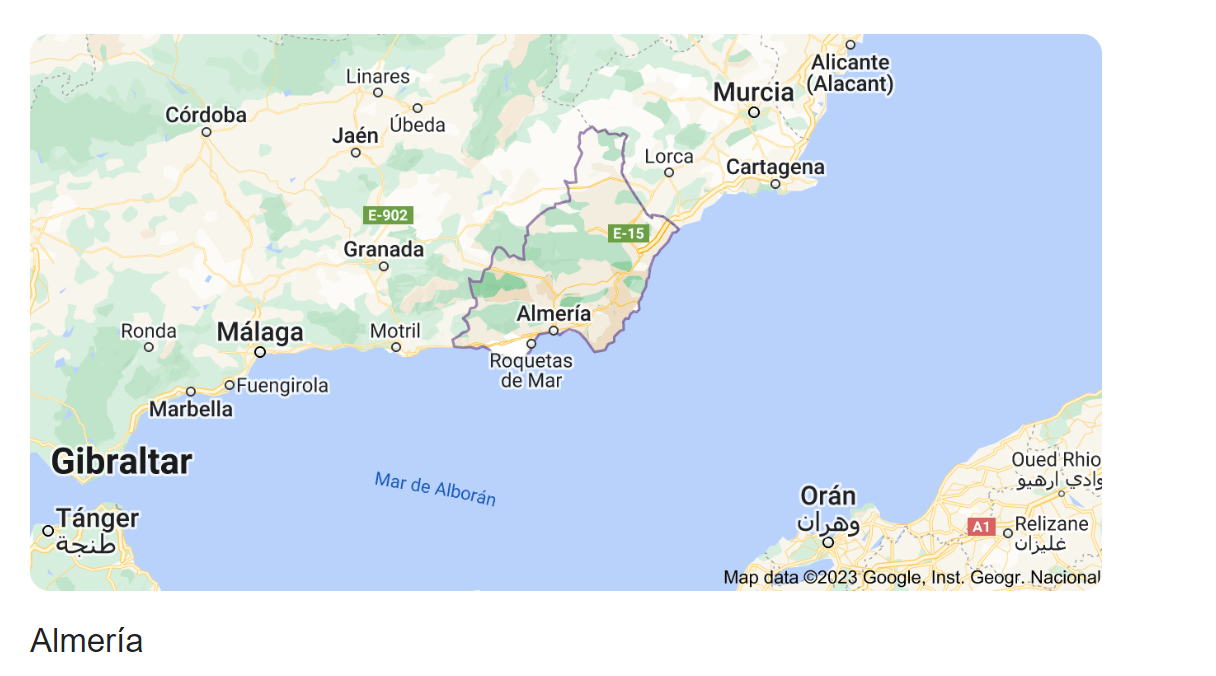

In [ ]:
# Creamos una función para generar una posición aleatoria en Almería
def generar_posicion():
    lat = random.uniform(36.7, 37.2)
    lng = random.uniform(-2.8, -2.2)
    return lat, lng

In [ ]:
# Agregamos las columnas de latitud y longitud al dataset
df['latitud'] = [generar_posicion()[0] for _ in range(len(df))]
df['longitud'] = [generar_posicion()[1] for _ in range(len(df))]


In [ ]:
df

,temperature,humidity,date,nombre_finca,Fertilizantes,latitud,longitud
0,13.0,58.0,2018-10-31,Estrada LLC,No,36.901993,-2.647808
1,13.0,58.0,2018-01-25,"Roberson, Hunter and Webb",No,37.030147,-2.358589
2,13.0,58.0,2018-02-12,Schneider-Rasmussen,No,36.785225,-2.724392
3,13.0,58.0,2018-02-25,"Rodriguez, Montgomery and Valentine",Sí,36.761562,-2.727947
4,13.0,58.0,2018-04-26,"Rodriguez, Montgomery and Valentine",No,36.852465,-2.452961
...,...,...,...,...,...,...,...
17300,10.0,69.0,2018-06-22,Lopez and Sons,No,37.139954,-2.677680
17301,10.0,69.0,2018-07-25,Strickland-Rose,Sí,37.095766,-2.543426
17302,10.0,69.0,2018-10-14,Estrada LLC,No,37.196858,-2.472977
17303,10.0,69.0,2018-04-21,Estrada LLC,No,36.970517,-2.636477


# Unicon con el otro dataset
Ahora que ya hemos generado nuestro propio dataset con información sobre fincas de Almería y sus cultivos de tomate, vamos a utilizar el otro dataset que contiene información sobre los diferentes tipos de tomates, incluyendo su Brix, acidez, agua, índice de madurez, calibre y la época del año en la que se cultivan.

 El otro dataset que vamos a utilizar incluye información sobre diferentes tipos de tomates, como su índice de madurez, nivel de dulzura, acidez, calibre, entre otros factores. Nuestro objetivo principal es utilizar esta información junto con la información de nuestro dataset original para determinar si la frescura de los tomates es buena o no. Para lograr esto, combinaremos los datos de ambos datasets utilizando el tipo de tomate como clave principal de unión. Luego, utilizaremos técnicas de análisis exploratorio de datos y aprendizaje automático para determinar qué factores influyen en la frescura de los tomates y cómo podemos utilizar esta información para tomar decisiones informadas en la producción de tomates frescos y de alta calidad.

## Loading data

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/UAX/Inteligencia Artificial/Tomates de Almería/Parte 1/Data/datos_sin_procesar.csv')
data.head()

,Unnamed: 0,Tipo,Brix,Acidez,Agua,Índice padurez,Calibre,Primavera,Verano,Otoño,Invierno
0,0,Beef,5.28,0.42,96.25,14.16,9,Sí,No,No,Sí
1,1,Rosa,5.48,0.41,96.80,12.73,8,Sí,No,No,Sí
2,2,Liso,6.13,0.37,96.22,12.07,9,Sí,No,Sí,Sí
3,3,Beef,5.59,0.44,96.92,12.70,11,Sí,No,No,Sí
4,4,Pera,5.57,0.33,94.04,13.32,6,Sí,Sí,Sí,Sí


In [ ]:
df.head()

,temperature,humidity,date,nombre_finca,Fertilizantes,latitud,longitud
0,13.0,58.0,2018-10-31,Estrada LLC,No,36.901993,-2.647808
1,13.0,58.0,2018-01-25,"Roberson, Hunter and Webb",No,37.030147,-2.358589
2,13.0,58.0,2018-02-12,Schneider-Rasmussen,No,36.785225,-2.724392
3,13.0,58.0,2018-02-25,"Rodriguez, Montgomery and Valentine",Sí,36.761562,-2.727947
4,13.0,58.0,2018-04-26,"Rodriguez, Montgomery and Valentine",No,36.852465,-2.452961


In [ ]:
df_merged = df.merge(data, left_index=True, right_index=True)

In [ ]:
df_merged.head()

,temperature,humidity,date,nombre_finca,Fertilizantes,latitud,longitud,Unnamed: 0,Tipo,Brix,Acidez,Agua,Índice padurez,Calibre,Primavera,Verano,Otoño,Invierno
0,13.0,58.0,2018-10-31,Estrada LLC,No,36.901993,-2.647808,0,Beef,5.28,0.42,96.25,14.16,9,Sí,No,No,Sí
1,13.0,58.0,2018-01-25,"Roberson, Hunter and Webb",No,37.030147,-2.358589,1,Rosa,5.48,0.41,96.80,12.73,8,Sí,No,No,Sí
2,13.0,58.0,2018-02-12,Schneider-Rasmussen,No,36.785225,-2.724392,2,Liso,6.13,0.37,96.22,12.07,9,Sí,No,Sí,Sí
3,13.0,58.0,2018-02-25,"Rodriguez, Montgomery and Valentine",Sí,36.761562,-2.727947,3,Beef,5.59,0.44,96.92,12.70,11,Sí,No,No,Sí
4,13.0,58.0,2018-04-26,"Rodriguez, Montgomery and Valentine",No,36.852465,-2.452961,4,Pera,5.57,0.33,94.04,13.32,6,Sí,Sí,Sí,Sí


In [ ]:
df_merged.shape

(16995, 18)

In [ ]:
# Convertir la columna 'date' en objetos de fecha y hora
df_merged['date'] = pd.to_datetime(df_merged['date'])

# Extraer el mes de cultivo y guardarlo en una nueva columna
df_merged['mes_cultivo'] = df_merged['date'].dt.month

In [ ]:
df_merged

,temperature,humidity,date,nombre_finca,Fertilizantes,latitud,longitud,Unnamed: 0,Tipo,Brix,Acidez,Agua,Índice padurez,Calibre,Primavera,Verano,Otoño,Invierno,mes_cultivo
0,13.0,58.0,2018-10-31,Estrada LLC,No,36.901993,-2.647808,0,Beef,5.28,0.42,96.25,14.16,9,Sí,No,No,Sí,10
1,13.0,58.0,2018-01-25,"Roberson, Hunter and Webb",No,37.030147,-2.358589,1,Rosa,5.48,0.41,96.80,12.73,8,Sí,No,No,Sí,1
2,13.0,58.0,2018-02-12,Schneider-Rasmussen,No,36.785225,-2.724392,2,Liso,6.13,0.37,96.22,12.07,9,Sí,No,Sí,Sí,2
3,13.0,58.0,2018-02-25,"Rodriguez, Montgomery and Valentine",Sí,36.761562,-2.727947,3,Beef,5.59,0.44,96.92,12.70,11,Sí,No,No,Sí,2
4,13.0,58.0,2018-04-26,"Rodriguez, Montgomery and Valentine",No,36.852465,-2.452961,4,Pera,5.57,0.33,94.04,13.32,6,Sí,Sí,Sí,Sí,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16995,14.0,58.0,2018-08-10,Schneider-Rasmussen,No,36.779304,-2.468051,16995,Rebelión,6.06,0.37,94.97,12.40,7,Sí,Sí,No,Sí,8
16996,14.0,58.0,2018-04-02,"Murphy, Myers and Mitchell",No,37.178957,-2.589041,16996,Adora,9.32,0.80,85.63,12.88,5,Sí,No,No,Sí,4
16997,14.0,58.0,2018-01-31,Estrada LLC,Sí,36.913094,-2.769802,16997,San Marzano,3.98,0.30,95.54,13.01,10,Sí,Sí,No,Sí,1
16998,14.0,58.0,2018-01-22,Lopez and Sons,Sí,36.965865,-2.494008,16998,San Marzano,4.01,0.30,95.81,14.27,12,Sí,Sí,No,Sí,1


In [ ]:
df_merged['mes_cultivo_2'] = df_merged['date'].dt.month


In [ ]:
df_merged

,temperature,humidity,date,nombre_finca,Fertilizantes,latitud,longitud,Unnamed: 0,Tipo,Brix,...,Agua,Índice padurez,Calibre,Primavera,Verano,Otoño,Invierno,mes_cultivo,mes_cultivo_2,estacion_cultivo
0,13.0,58.0,2018-10-31,Estrada LLC,No,36.901993,-2.647808,0,Beef,5.28,...,96.25,14.16,9,Sí,No,No,Sí,10,10,
1,13.0,58.0,2018-01-25,"Roberson, Hunter and Webb",No,37.030147,-2.358589,1,Rosa,5.48,...,96.80,12.73,8,Sí,No,No,Sí,1,1,
2,13.0,58.0,2018-02-12,Schneider-Rasmussen,No,36.785225,-2.724392,2,Liso,6.13,...,96.22,12.07,9,Sí,No,Sí,Sí,2,2,
3,13.0,58.0,2018-02-25,"Rodriguez, Montgomery and Valentine",Sí,36.761562,-2.727947,3,Beef,5.59,...,96.92,12.70,11,Sí,No,No,Sí,2,2,
4,13.0,58.0,2018-04-26,"Rodriguez, Montgomery and Valentine",No,36.852465,-2.452961,4,Pera,5.57,...,94.04,13.32,6,Sí,Sí,Sí,Sí,4,4,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16995,14.0,58.0,2018-08-10,Schneider-Rasmussen,No,36.779304,-2.468051,16995,Rebelión,6.06,...,94.97,12.40,7,Sí,Sí,No,Sí,8,8,
16996,14.0,58.0,2018-04-02,"Murphy, Myers and Mitchell",No,37.178957,-2.589041,16996,Adora,9.32,...,85.63,12.88,5,Sí,No,No,Sí,4,4,
16997,14.0,58.0,2018-01-31,Estrada LLC,Sí,36.913094,-2.769802,16997,San Marzano,3.98,...,95.54,13.01,10,Sí,Sí,No,Sí,1,1,
16998,14.0,58.0,2018-01-22,Lopez and Sons,Sí,36.965865,-2.494008,16998,San Marzano,4.01,...,95.81,14.27,12,Sí,Sí,No,Sí,1,1,


In [ ]:
df_merged['estacion_cultivo'] = ''
df_merged.loc[(df_merged['mes_cultivo'].isin([3, 4, 5])) & (data['Primavera'] == 'Sí'), 'estacion_cultivo'] = 'Primavera'
df_merged.loc[(df_merged['mes_cultivo'].isin([6, 7, 8])) & (data['Verano'] == 'Sí'), 'estacion_cultivo'] = 'Verano'
df_merged.loc[(df_merged['mes_cultivo'].isin([9, 10, 11])) & (data['Otoño'] == 'Sí'), 'estacion_cultivo'] = 'Otoño'
df_merged.loc[(df_merged['mes_cultivo'].isin([12, 1, 2])) & (data['Invierno'] == 'Sí'), 'estacion_cultivo'] = 'Invierno'

In [ ]:
df_merged.head(5)

,temperature,humidity,date,nombre_finca,Fertilizantes,latitud,longitud,Unnamed: 0,Tipo,Brix,...,Agua,Índice padurez,Calibre,Primavera,Verano,Otoño,Invierno,mes_cultivo,mes_cultivo_2,estacion_cultivo
0,13.0,58.0,2018-10-31,Estrada LLC,No,36.901993,-2.647808,0,Beef,5.28,...,96.25,14.16,9,Sí,No,No,Sí,10,10,
1,13.0,58.0,2018-01-25,"Roberson, Hunter and Webb",No,37.030147,-2.358589,1,Rosa,5.48,...,96.80,12.73,8,Sí,No,No,Sí,1,1,Invierno
2,13.0,58.0,2018-02-12,Schneider-Rasmussen,No,36.785225,-2.724392,2,Liso,6.13,...,96.22,12.07,9,Sí,No,Sí,Sí,2,2,Invierno
3,13.0,58.0,2018-02-25,"Rodriguez, Montgomery and Valentine",Sí,36.761562,-2.727947,3,Beef,5.59,...,96.92,12.70,11,Sí,No,No,Sí,2,2,Invierno
4,13.0,58.0,2018-04-26,"Rodriguez, Montgomery and Valentine",No,36.852465,-2.452961,4,Pera,5.57,...,94.04,13.32,6,Sí,Sí,Sí,Sí,4,4,Primavera


In [ ]:
df_merged.isna().sum()

temperature         0
humidity            0
date                0
nombre_finca        0
Fertilizantes       0
latitud             0
longitud            0
Unnamed: 0          0
Tipo                0
Brix                0
Acidez              0
Agua                0
Índice padurez      0
Calibre             0
Primavera           0
Verano              0
Otoño               0
Invierno            0
mes_cultivo         0
mes_cultivo_2       0
estacion_cultivo    0
dtype: int64

Vamos a ver que filas contienen una cadena de texto vacía ' '

In [ ]:
df_mes_vacio = df_merged[df_merged['estacion_cultivo'] == '']

In [ ]:
df_mes_vacio

,temperature,humidity,date,nombre_finca,Fertilizantes,latitud,longitud,Unnamed: 0,Tipo,Brix,...,Agua,Índice padurez,Calibre,Primavera,Verano,Otoño,Invierno,mes_cultivo,mes_cultivo_2,estacion_cultivo
0,13.0,58.0,2018-10-31,Estrada LLC,No,36.901993,-2.647808,0,Beef,5.28,...,96.25,14.16,9,Sí,No,No,Sí,10,10,
6,13.0,58.0,2018-09-01,Schneider-Rasmussen,Sí,36.836806,-2.288263,6,Adora,7.19,...,85.61,12.11,7,Sí,No,No,Sí,9,9,
8,13.0,58.0,2018-10-01,"Roberson, Hunter and Webb",No,37.018497,-2.676474,8,Beef,5.22,...,96.39,13.53,9,Sí,No,No,Sí,10,10,
9,13.0,58.0,2018-11-22,Strickland-Rose,No,36.920373,-2.259890,9,San Marzano,3.91,...,95.63,13.47,11,Sí,Sí,No,Sí,11,11,
28,13.0,58.0,2018-07-22,"Murphy, Myers and Mitchell",No,36.921852,-2.625400,28,Cherry Redondo,6.86,...,87.94,10.74,1,Sí,No,Sí,Sí,7,7,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16972,15.0,58.0,2018-06-14,Schneider-Rasmussen,No,36.988400,-2.737412,16972,Flamenko,6.26,...,86.10,14.40,7,Sí,No,No,Sí,6,6,
16975,15.0,58.0,2018-08-08,"Rodriguez, Montgomery and Valentine",No,37.178663,-2.708627,16975,Cherry Redondo,7.16,...,86.68,10.96,2,Sí,No,Sí,Sí,8,8,
16989,14.0,58.0,2018-08-15,Jones-Boyd,Sí,36.726176,-2.292400,16989,Rosa,5.59,...,96.22,13.93,8,Sí,No,No,Sí,8,8,
16990,14.0,58.0,2018-11-03,Strickland-Rose,Sí,36.715120,-2.589087,16990,Rebelión,7.42,...,94.18,12.15,9,Sí,Sí,No,Sí,11,11,


In [ ]:
df_mes_vacio.shape

(4989, 21)

Eliminamos las columnas con cadena de texto vacía ' '

In [ ]:
df_merged = df_merged.drop(df_merged[df_merged['estacion_cultivo'] == ''].index)

In [ ]:
df_merged

,temperature,humidity,date,nombre_finca,Fertilizantes,latitud,longitud,Unnamed: 0,Tipo,Brix,...,Agua,Índice padurez,Calibre,Primavera,Verano,Otoño,Invierno,mes_cultivo,mes_cultivo_2,estacion_cultivo
1,13.0,58.0,2018-01-25,"Roberson, Hunter and Webb",No,37.030147,-2.358589,1,Rosa,5.48,...,96.80,12.73,8,Sí,No,No,Sí,1,1,Invierno
2,13.0,58.0,2018-02-12,Schneider-Rasmussen,No,36.785225,-2.724392,2,Liso,6.13,...,96.22,12.07,9,Sí,No,Sí,Sí,2,2,Invierno
3,13.0,58.0,2018-02-25,"Rodriguez, Montgomery and Valentine",Sí,36.761562,-2.727947,3,Beef,5.59,...,96.92,12.70,11,Sí,No,No,Sí,2,2,Invierno
4,13.0,58.0,2018-04-26,"Rodriguez, Montgomery and Valentine",No,36.852465,-2.452961,4,Pera,5.57,...,94.04,13.32,6,Sí,Sí,Sí,Sí,4,4,Primavera
5,13.0,58.0,2018-03-20,Jones-Boyd,Sí,37.123766,-2.399430,5,Cherry Pera,7.38,...,88.08,15.52,3,Sí,No,Sí,Sí,3,3,Primavera
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16995,14.0,58.0,2018-08-10,Schneider-Rasmussen,No,36.779304,-2.468051,16995,Rebelión,6.06,...,94.97,12.40,7,Sí,Sí,No,Sí,8,8,Verano
16996,14.0,58.0,2018-04-02,"Murphy, Myers and Mitchell",No,37.178957,-2.589041,16996,Adora,9.32,...,85.63,12.88,5,Sí,No,No,Sí,4,4,Primavera
16997,14.0,58.0,2018-01-31,Estrada LLC,Sí,36.913094,-2.769802,16997,San Marzano,3.98,...,95.54,13.01,10,Sí,Sí,No,Sí,1,1,Invierno
16998,14.0,58.0,2018-01-22,Lopez and Sons,Sí,36.965865,-2.494008,16998,San Marzano,4.01,...,95.81,14.27,12,Sí,Sí,No,Sí,1,1,Invierno


In [ ]:

df_merged = df_merged.drop(['mes_cultivo', 'mes_cultivo_2', 'estacion_cultivo'], axis=1)

In [ ]:
df_merged

,temperature,humidity,date,nombre_finca,Fertilizantes,latitud,longitud,Unnamed: 0,Tipo,Brix,Acidez,Agua,Índice padurez,Calibre,Primavera,Verano,Otoño,Invierno
1,13.0,58.0,2018-01-25,"Roberson, Hunter and Webb",No,37.030147,-2.358589,1,Rosa,5.48,0.41,96.80,12.73,8,Sí,No,No,Sí
2,13.0,58.0,2018-02-12,Schneider-Rasmussen,No,36.785225,-2.724392,2,Liso,6.13,0.37,96.22,12.07,9,Sí,No,Sí,Sí
3,13.0,58.0,2018-02-25,"Rodriguez, Montgomery and Valentine",Sí,36.761562,-2.727947,3,Beef,5.59,0.44,96.92,12.70,11,Sí,No,No,Sí
4,13.0,58.0,2018-04-26,"Rodriguez, Montgomery and Valentine",No,36.852465,-2.452961,4,Pera,5.57,0.33,94.04,13.32,6,Sí,Sí,Sí,Sí
5,13.0,58.0,2018-03-20,Jones-Boyd,Sí,37.123766,-2.399430,5,Cherry Pera,7.38,0.53,88.08,15.52,3,Sí,No,Sí,Sí
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16995,14.0,58.0,2018-08-10,Schneider-Rasmussen,No,36.779304,-2.468051,16995,Rebelión,6.06,0.37,94.97,12.40,7,Sí,Sí,No,Sí
16996,14.0,58.0,2018-04-02,"Murphy, Myers and Mitchell",No,37.178957,-2.589041,16996,Adora,9.32,0.80,85.63,12.88,5,Sí,No,No,Sí
16997,14.0,58.0,2018-01-31,Estrada LLC,Sí,36.913094,-2.769802,16997,San Marzano,3.98,0.30,95.54,13.01,10,Sí,Sí,No,Sí
16998,14.0,58.0,2018-01-22,Lopez and Sons,Sí,36.965865,-2.494008,16998,San Marzano,4.01,0.30,95.81,14.27,12,Sí,Sí,No,Sí


In [ ]:
df_merged.shape

(12006, 18)

In [ ]:
df_merged.to_csv('/content/drive/MyDrive/UAX/Inteligencia Artificial/Tomates de Almería/Parte 1/Data/datos_juntos.csv')